In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Constantes do problema
R = 1
C = 10
q0 = 100

# Constantes da solução
N = 21 # número de pontos
dt = 10
t = np.linspace(0, dt*(N-1), N)

# EDO
def dq(t, q):
    return -q / R / C

In [13]:
# Solução Analítica
q1 = q0 * np.exp(-t / R / C)

In [14]:
# Método de Euler
q2 = np.zeros(N)
q2[0] = q0
for i in range(1, N):
    q2[i] = q2[i-1] + dt*dq((i-1)*dt, q2[i-1])

In [15]:
# Método de Euler Modificado
q3 = np.zeros(N)
q3[0] = q0
for i in range(1, N):
    k1 = dt * dq((i-1)*dt, q3[i-1])
    k2 = dt * dq(i*dt,     q3[i-1] + k1)
    q3[i] = q3[i-1] + (k1 + k2) / 2

In [16]:
# Método do Ponto Médio
q4 = np.zeros(N)
q4[0] = q0
for i in range(1, N):
    k1 = dt * dq((i-1)*dt, q4[i-1])
    k2 = dt * dq(i*dt,     q4[i-1] + k1/2)
    q4[i] = q4[i-1] + k2

In [17]:
# Método de Runge-Kutta de 4a ordem
q5 = np.zeros(N)
q5[0] = q0
for i in range(1, N):
    k1 = dt * dq((i-1)*dt,        q5[i-1])
    k2 = dt * dq((i-1)*dt + dt/2, q5[i-1] + k1/2)
    k3 = dt * dq((i-1)*dt + dt/2, q5[i-1] + k2/2)
    k4 = dt * dq((i-1)*dt + dt,   q5[i-1] + k3)
    q5[i] = q5[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

In [18]:
# Método de Taylor de 2a ordem
q6 = np.zeros(N)
q6[0] = q0

def d2q(t, q):
    return q / (R*C)**2

for i in range(1, N):
    q6[i] = q6[i-1] + dt * dq((i-1)*dt, q6[i-1]) + (dt**2/2)*d2q((i-1)*dt, q6[i-1])

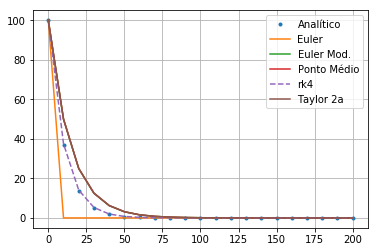

In [19]:
# Visualização dos resultados
plt.plot(t, q1, '.')
plt.plot(t, q2)
plt.plot(t, q3)
plt.plot(t, q4)
plt.plot(t, q5, '--')
plt.plot(t, q6)
plt.grid(True)
plt.legend(['Analítico', 'Euler', 'Euler Mod.', 'Ponto Médio', 'rk4', 'Taylor 2a'])